**IRIS FLOWER CLASSIFICATION**

This can be done using any classification algorithms, but I am using Random Forest because of better accuracy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#DATA PREPROCESSING - DATA CLEANING
data.isna().sum()      # CHECKING FOR MISSING VALUES

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#Frequency distribution of species
freq_dist = pd.crosstab(index=data["Species"], columns="count") 

freq_dist

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


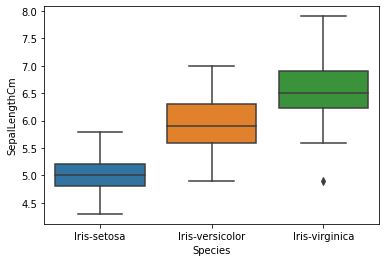

In [ ]:
# MEASURES OF DISTRIBUTION SHAPE - OUTLIERS DETECTION 
sns.boxplot(x="Species",y="SepalLengthCm",data=data)
plt.show()

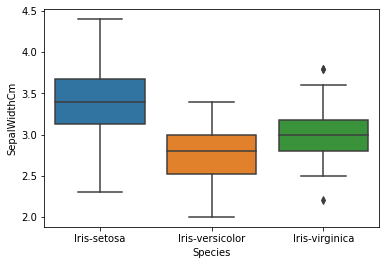

In [ ]:
sns.boxplot(x="Species",y="SepalWidthCm",data=data)
plt.show()

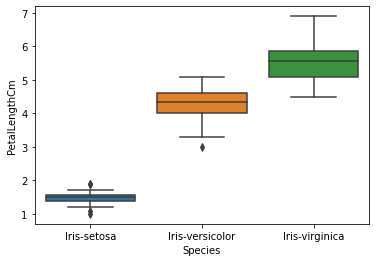

In [ ]:
sns.boxplot(x="Species",y="PetalLengthCm",data=data)
plt.show()

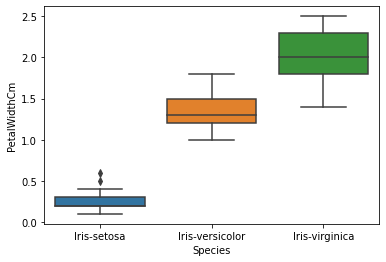

In [ ]:
sns.boxplot(x="Species",y="PetalWidthCm",data=data)
plt.show()

<Axes: >

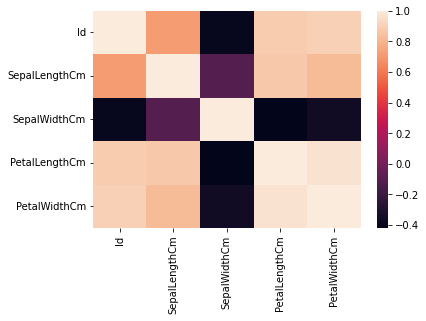

In [ ]:
# VISUALIZING CORRELATION BETWEEN THE FEATURES
sns.heatmap(data.corr())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
Species = pd.get_dummies(data['Species'],drop_first=False)
Species

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
data.drop(['Species'],axis=1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [ ]:
df=pd.concat([data,Species],axis=1)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0,0,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0,0,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0,0,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0,0,1


In [ ]:
# DEFINING DEPENDENT AND INDEPENDENT VARIABLES
features = ['Id','SepalLengthCm','SepalWidthCm','SepalWidthCm','PetalWidthCm']
X = df.iloc[:,1:5]
Y = df.iloc[:,-1]

In [ ]:
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Iris-virginica, Length: 150, dtype: uint8


In [ ]:
# SPLITTING THE DATA INTO TRAINING AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0, n_jobs=2)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [ ]:
print(y_test)

114    1
62     0
33     0
107    1
7      0
100    1
40     0
86     0
76     0
71     0
134    1
51     0
73     0
54     0
63     0
37     0
78     0
90     0
45     0
16     0
121    1
66     0
24     0
8      0
126    1
22     0
44     0
97     0
93     0
26     0
137    1
84     0
27     0
127    1
132    1
59     0
18     0
83     0
61     0
92     0
112    1
2      0
141    1
43     0
10     0
Name: Iris-virginica, dtype: uint8


In [ ]:
print(y_pred)

[1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 1 0 1 0 0]


In [ ]:
print('percentage accuracy',100*accuracy_score(y_test, y_pred))

percentage accuracy 97.77777777777777
